### Imports

In [3]:
from main import run_main_2
import pandas as pd
import time
from copy import copy
import matplotlib.pyplot as plt
import math

### Configuraciones

In [4]:
CROSSOVER_METHODS = ["one_point", "double_point", "uniform", "anular"]
SELECTION_METHODS = ["elite", "roulette", "universal", "boltzmann", "deterministic_tournament", "probabilistic_tournament", "ranking"]
MUTATION_METHODS = ["gene_mutation","uniform_multigen", "complete_mutation", "limited_multigen"]
GENES = ["items", "height"]
NEW_GENERATION_METHODS = ["use_all", "new_over_actual"]
CHARACTER_TYPES = ["warrior", "archer", "defender", "infiltrator"]

In [5]:
config = {
    "N": 100, 
    "K": 30,
    "M": 20,
    "threshold": 0.7,
    "character_type": "archer",
    "selection_method_1": "deterministic_tournament",
    "selection_method_2": "boltzmann", 
    "selection_method_3": "deterministic_tournament", 
    "selection_method_4": "boltzmann",  
    "crossing_method": "double_point",
    "mutation_method": "uniform_multigen",
    "new_generation_method": "new_over_actual",
    "gene": "items",
    "A": 0.5,
    "B": 0.5,
    "p_m": 0.1,
    "Tc": 0.1,
    "T0": 10,
    "k": 2,
    "max_generations": 150,
    "max_generations_without_change": 5,
    "delta": 0, # No queremos que corte por diversidad
    "optimal_fitness": 100,
    "optimal_fitness_error": 2
}

### Set de gráficos 1

Primero, queremos comparar la performance contra la diversidad en función de la cantidad de generaciones. Para esto usamos 3 métodos de selección:

- Elite: Toma a los mejores
- Ruleta: Toma a los mejores con cierta probabilidad
- Torneo Probabilístico: Toma a los mejores con cierta probabilidad

Para generar los gráficos:

In [80]:
gen_limit = 150
repeats = 10

totalIterations = ((gen_limit-1) * 3)

result_list = []

currentIteration = 0 
startTime = time.time()

def print_progress():
    elapsedTime = time.time() - startTime
    estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
    percentageCompletion = (currentIteration / totalIterations) * 100
    print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


# TODO: Considerar esto
# for max_gen in range(1,gen_limit):
#     configCopy = copy(config)
#     configCopy['max_generations'] = max_gen
    
for select in SELECTION_METHODS:
    configCopy = copy(config)
    configCopy['selection_method_1'] = select
    configCopy['selection_method_2'] = select
    configCopy['selection_method_3'] = select
    configCopy['selection_method_4'] = select

    for run in range(1, repeats+1):
        mean_performances, diversities, generation, end_condition = run_main_2(configCopy)
        
        # TODO: El end_condition es innecesario que este en todos los resultados

        for i in range(generation):
            result_list.append({
                'generation': i,
                'mean_performance': mean_performances[i],
                'diversity': diversities[i],
                'selection_method': select,
                'end_condition': end_condition,
                'run': run
            })
        
        currentIteration += 1

        # Imprime el progreso cada 20 iteraciones
        if currentIteration % 20 == 0:
            print_progress()

Completion: 13.42% ETA: 1175.03s

In [81]:
df = pd.DataFrame(result_list)
df.to_csv('data/datos5.csv', index=False)

Para reutilizar los datos:

In [ ]:
# df = pd.read_csv('datos5.csv')

#### Performance promedio en función de la generación

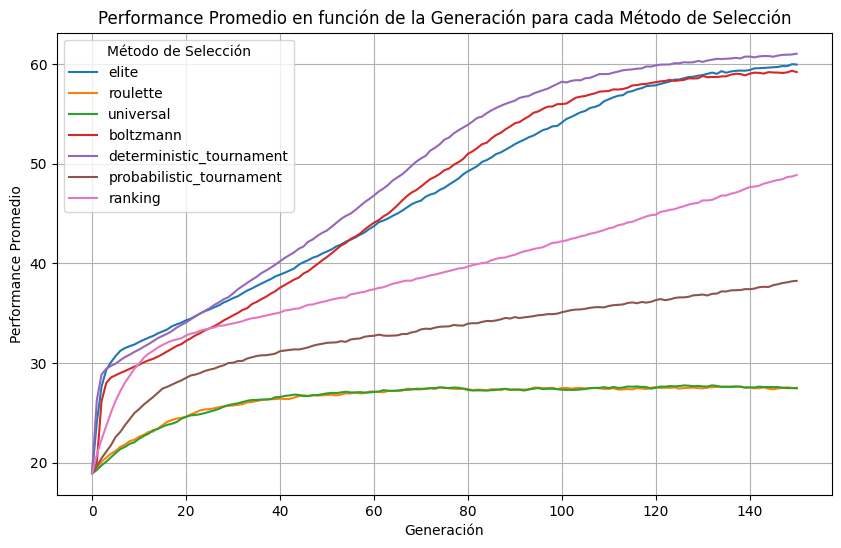

In [85]:
# Crear un gráfico de línea para cada selection_method
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Iterar a través de los valores únicos de 'selection_method'
for selection_method in df['selection_method'].unique():
    # Filtrar el DataFrame por 'selection_method' específico
    subset = df[df['selection_method'] == selection_method]

    mean_performance_avg = subset.groupby('generation')['mean_performance'].mean()
    
    # Crear el gráfico de línea para 'mean_performance' en función de 'generation'
    plt.plot(mean_performance_avg.index, mean_performance_avg, label=selection_method)

# Configurar etiquetas y leyenda
plt.xlabel('Generación')
plt.ylabel('Performance Promedio')
plt.title('Performance Promedio en función de la Generación para cada Método de Selección')
plt.legend(title='Método de Selección')

# Mostrar el gráfico
plt.grid(True)
plt.show()

#### Diversidad en función de la generación

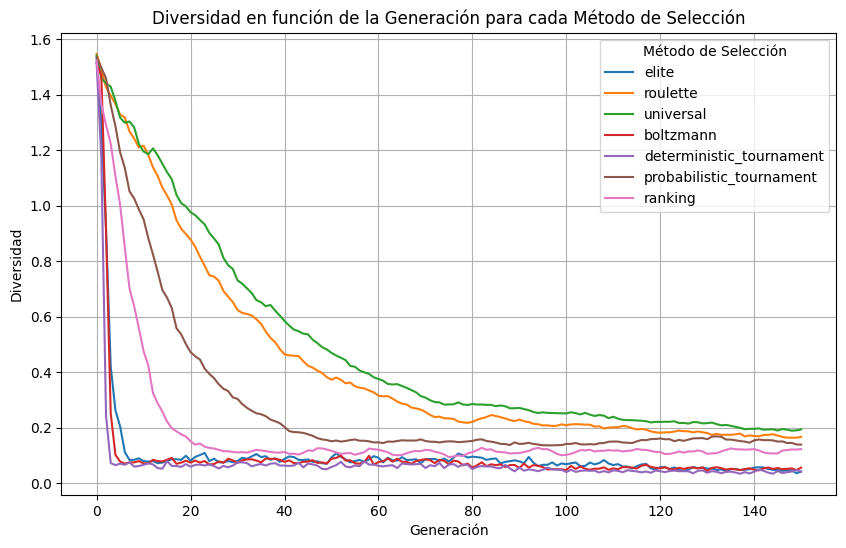

In [86]:
# Crear un gráfico de línea para cada selection_method
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Iterar a través de los valores únicos de 'selection_method'
for selection_method in df['selection_method'].unique():
    # Filtrar el DataFrame por 'selection_method' específico
    subset = df[df['selection_method'] == selection_method]
    
    diversity_avg = subset.groupby('generation')['diversity'].mean()
    
    # Crear el gráfico de línea para 'mean_performance' en función de 'generation'
    plt.plot(diversity_avg.index, diversity_avg, label=selection_method)

# Configurar etiquetas y leyenda
plt.xlabel('Generación')
plt.ylabel('Diversidad')
plt.title('Diversidad en función de la Generación para cada Método de Selección')
plt.legend(title='Método de Selección')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Set de Gráficos 2

Ahora, queremos probar qué pasa si vamos cambiando la probabilidad de mutación.


In [87]:
gen_limit = 150
repeats = 10

totalIterations = ((gen_limit-1) * 3)

result_list_2 = []

currentIteration = 0 
startTime = time.time()

def print_progress():
    elapsedTime = time.time() - startTime
    estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
    percentageCompletion = (currentIteration / totalIterations) * 100
    print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


# TODO: Considerar esto
# for max_gen in range(1,gen_limit):
#     configCopy = copy(config)
#     configCopy['max_generations'] = max_gen


for select in SELECTION_METHODS:
    configCopy = copy(config)
    configCopy['selection_method_1'] = select
    configCopy['selection_method_2'] = select
    configCopy['selection_method_3'] = select
    configCopy['selection_method_4'] = select

    for mutation_prob in [0.1, 0.25, 0.5, 0.75, 0.9]:	
        configCopy['p_m'] = mutation_prob

        for run in range(1, repeats+1):
            mean_performances, diversities, generation, end_condition = run_main_2(configCopy)
            
            # TODO: El end_condition es innecesario que este en todos los resultados

            for i in range(generation):
                result_list_2.append({
                    'generation': i,
                    'mean_performance': mean_performances[i],
                    'diversity': diversities[i],
                    'selection_method': select,
                    'p_m': mutation_prob,
                    'run': run
                })
            
            currentIteration += 1

            # Imprime el progreso cada 20 iteraciones
            if currentIteration % 20 == 0:
                print_progress()

Completion: 76.06% ETA: 299.96ss

In [88]:
df2 = pd.DataFrame(result_list_2)
df2.to_csv('data/datos6.csv', index=False)

#### Performance promedio en función de la generación (Agrupado por p_m)

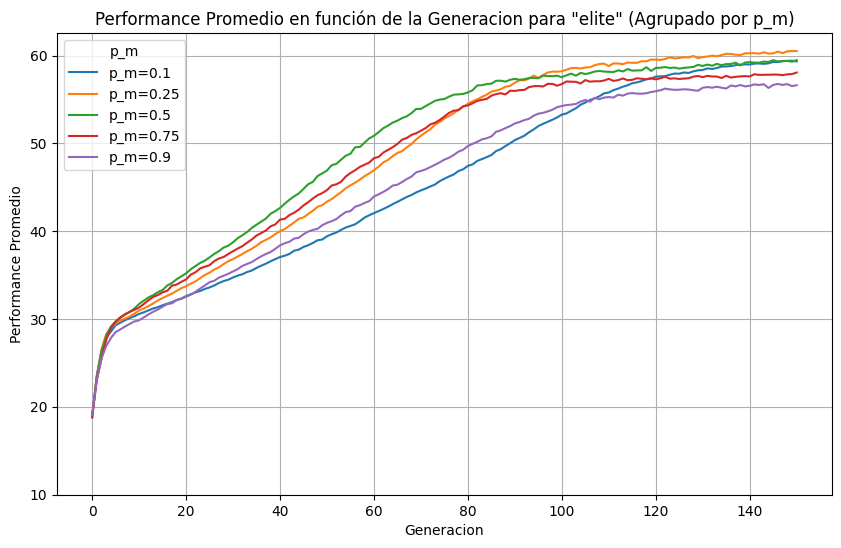

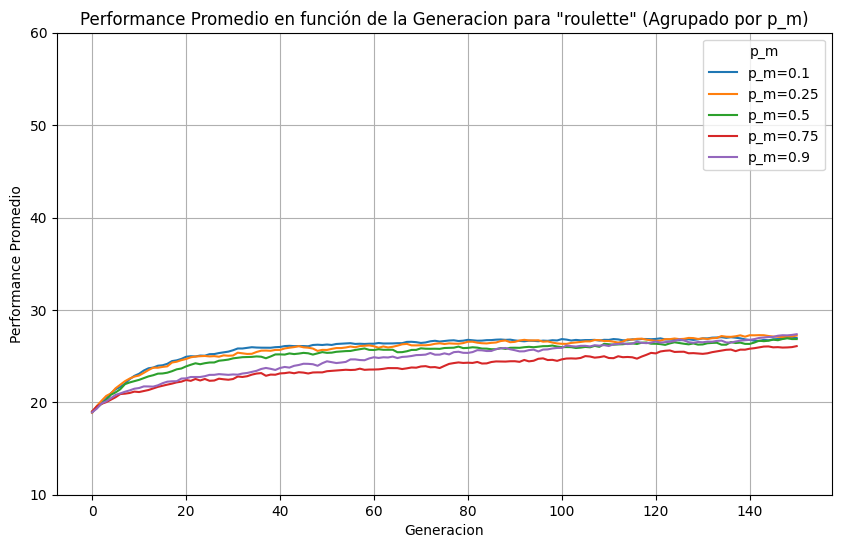

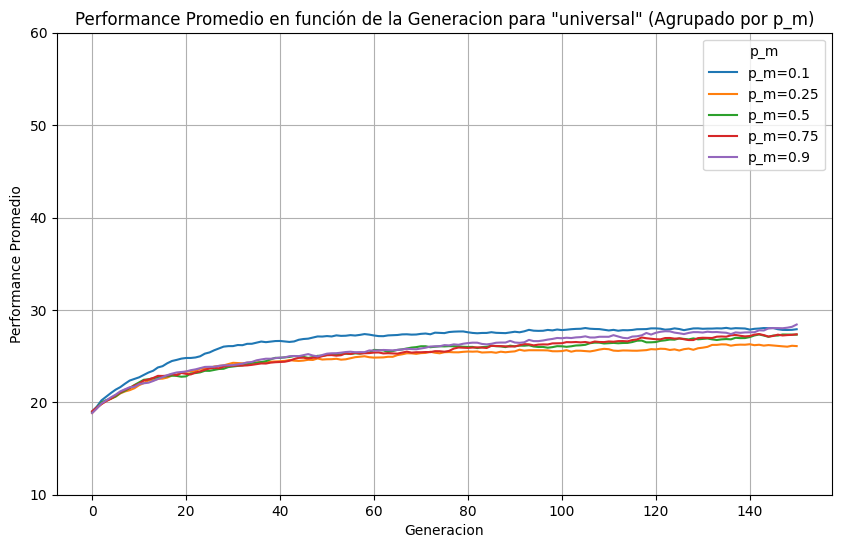

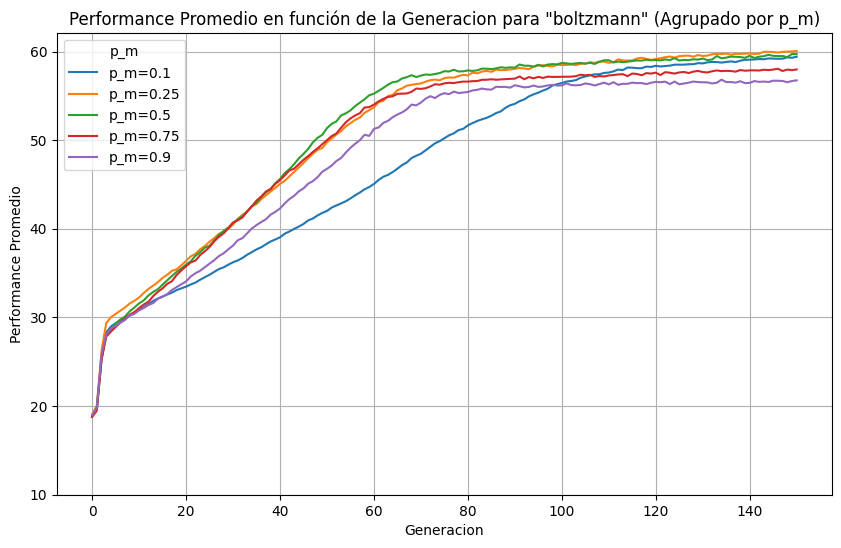

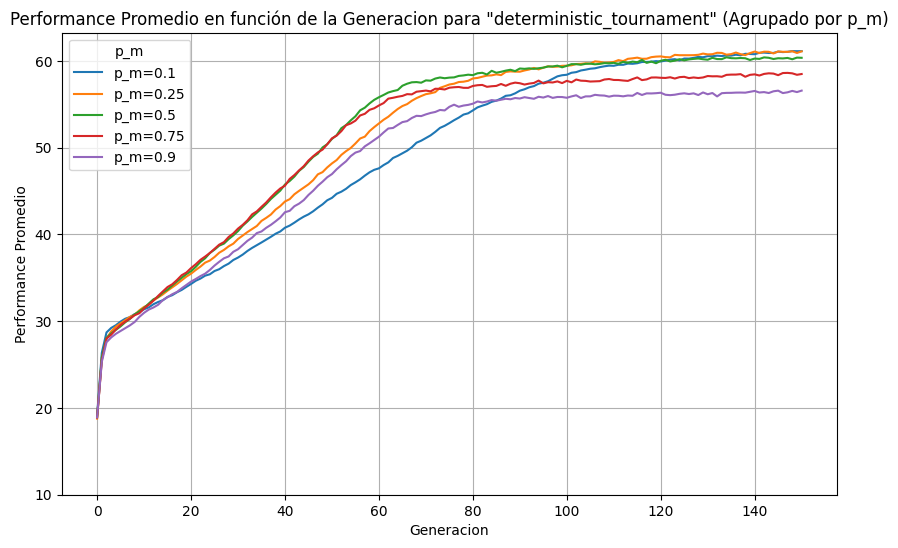

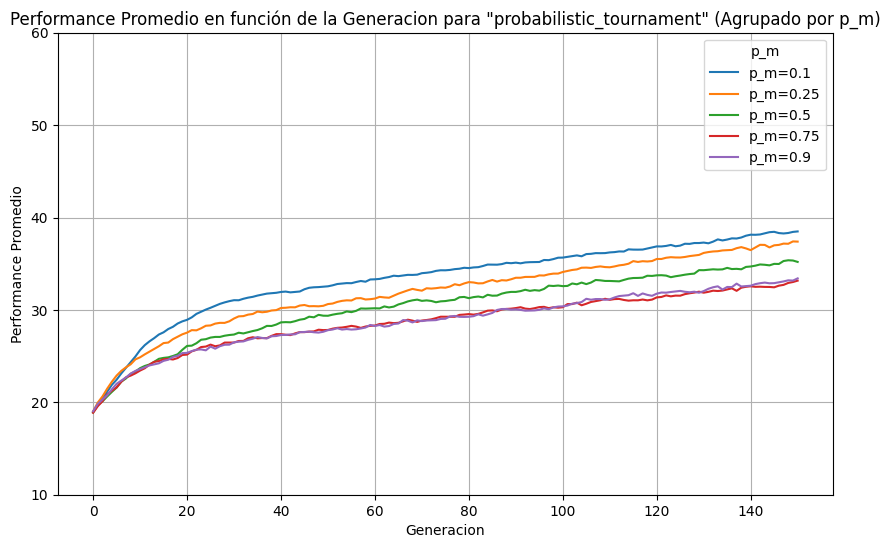

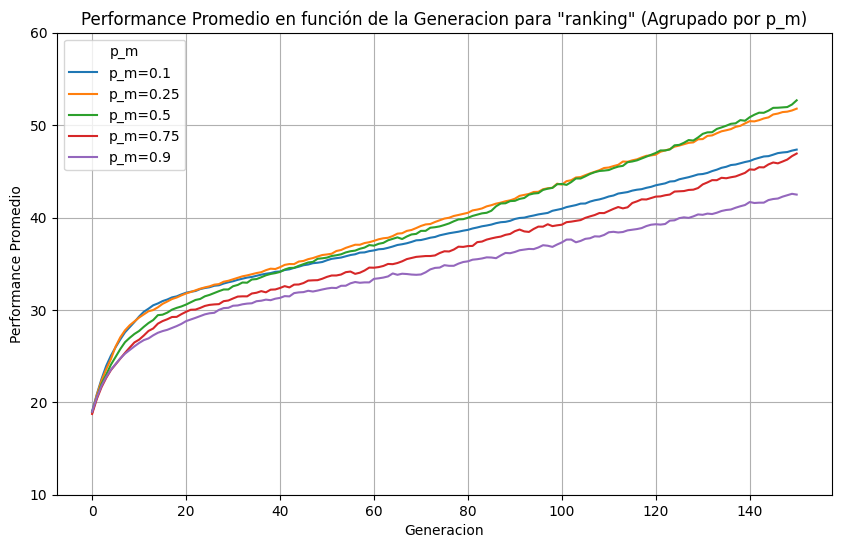

In [89]:
# Filtrar el DataFrame por selection_method específico (por ejemplo, "elite")
for selection_method in SELECTION_METHODS:
    subset = df2[df2['selection_method'] == selection_method]

    # Crear un gráfico de línea para cada valor único de p_m
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    for pm_value in subset['p_m'].unique():
        pm_subset = subset[subset['p_m'] == pm_value]
        mean_performance_avg = pm_subset.groupby('generation')['mean_performance'].mean()
        plt.plot(mean_performance_avg.index, mean_performance_avg, label=f'p_m={pm_value}')

    # Configurar etiquetas y leyenda
    plt.yticks(range(10, 61, 10))
    plt.xlabel('Generacion')
    plt.ylabel('Performance Promedio')
    plt.title(f'Performance Promedio en función de la Generacion para "{selection_method}" (Agrupado por p_m)')
    plt.legend(title='p_m')

    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

#### Diversidad en función de la generación (Agrupado por p_m)

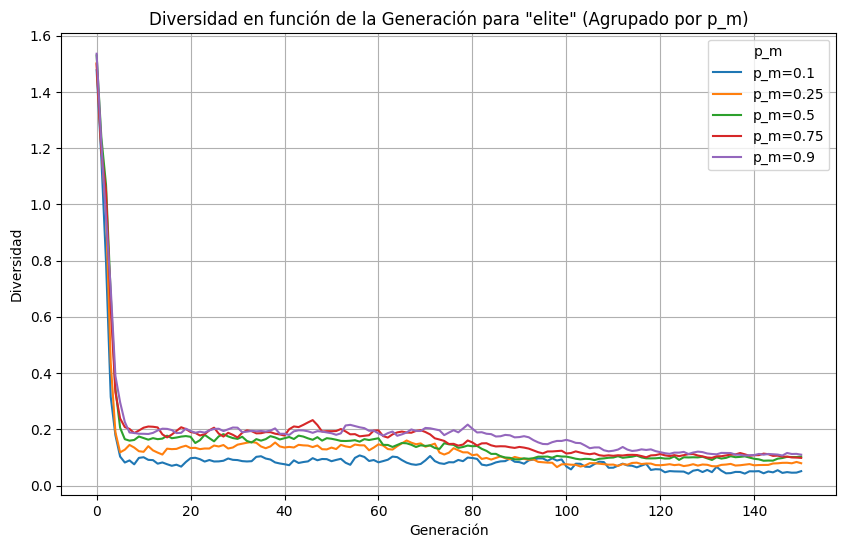

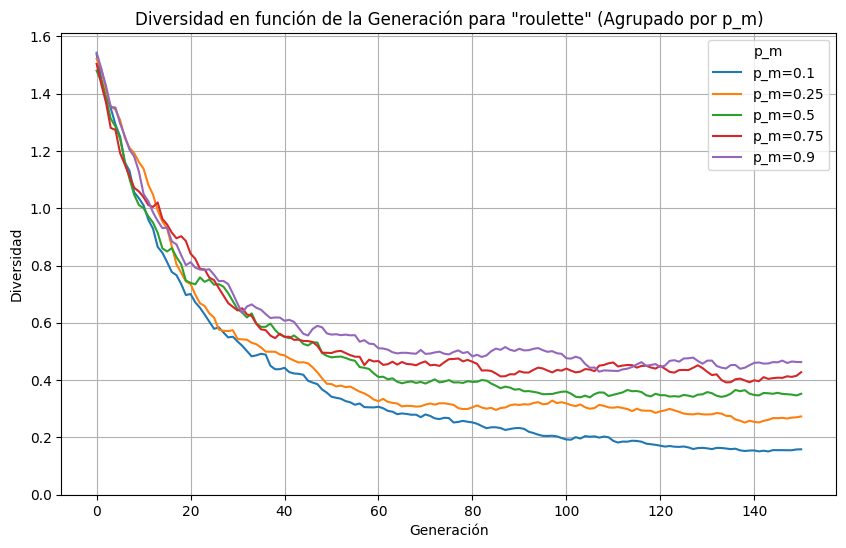

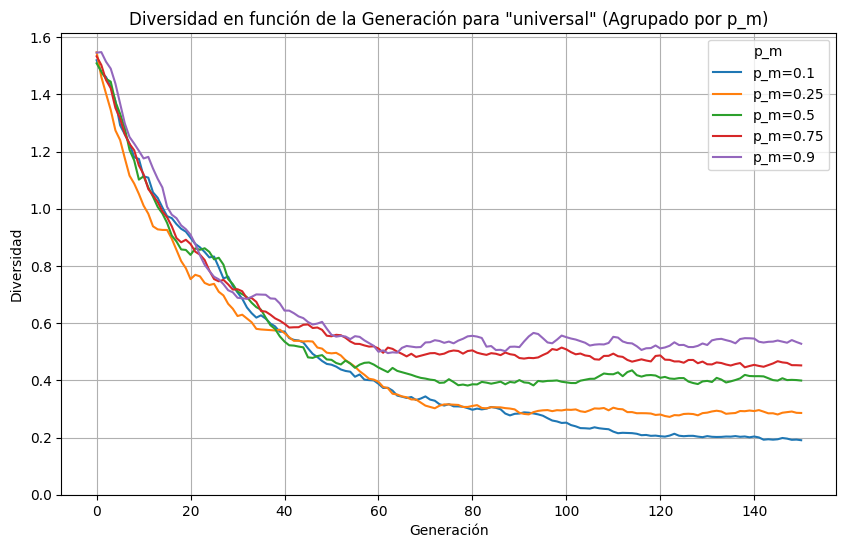

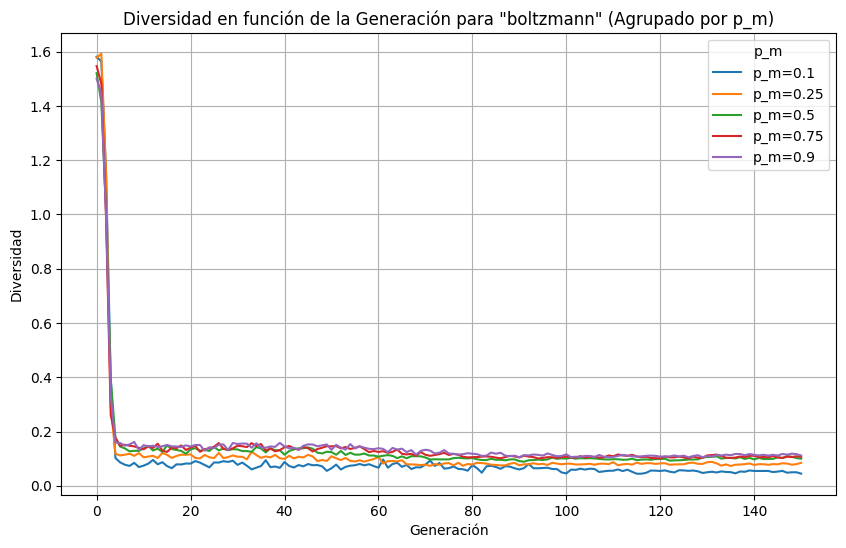

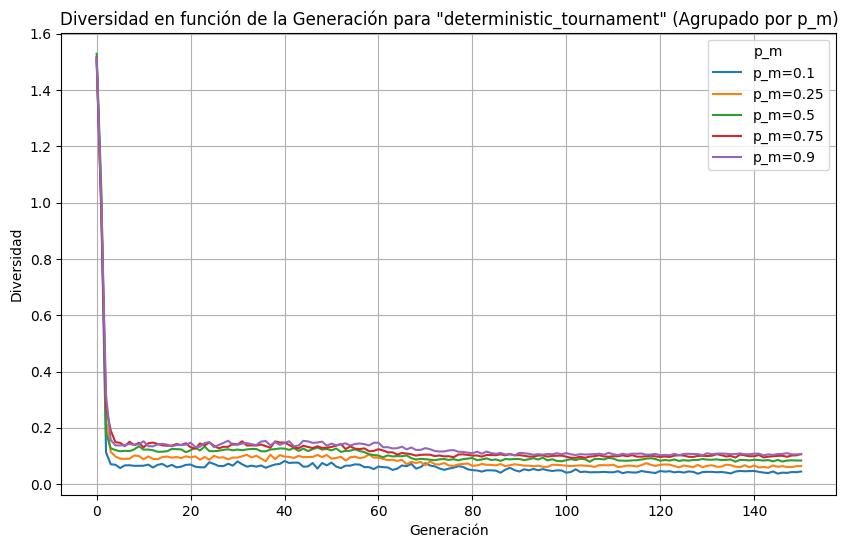

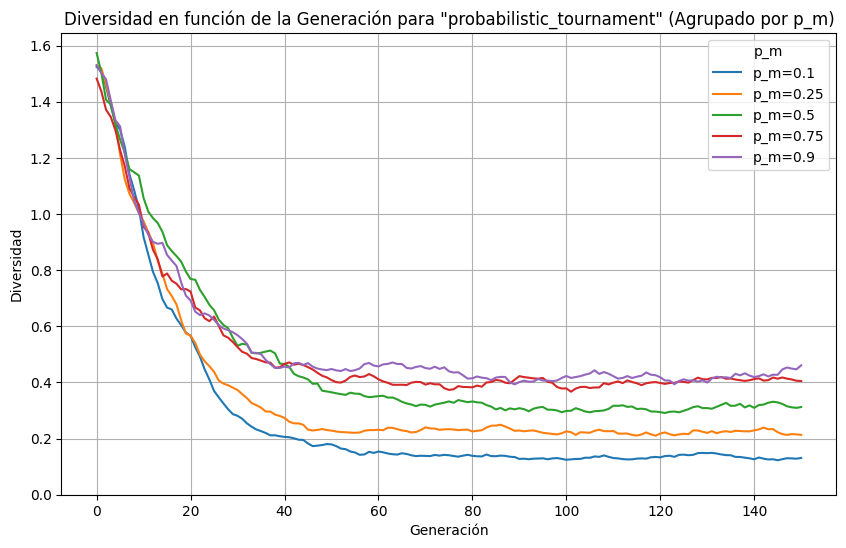

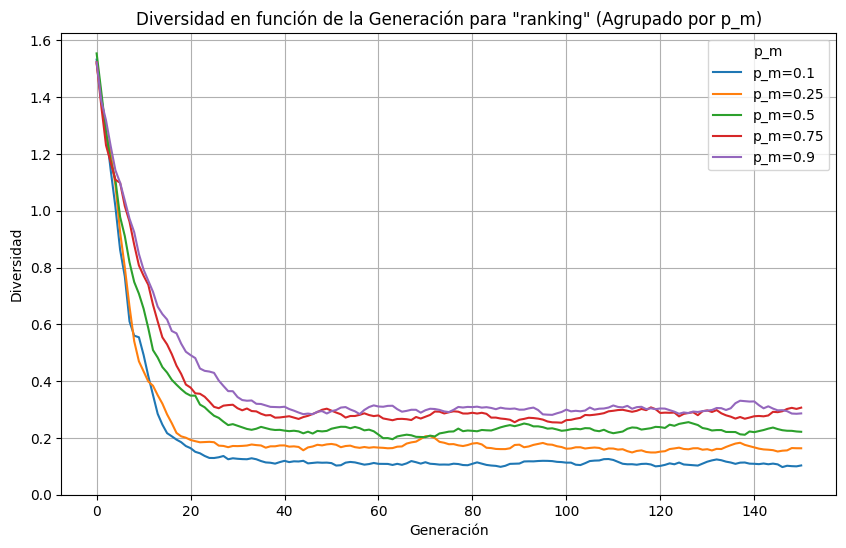

In [90]:
# Filtrar el DataFrame por selection_method específico (por ejemplo, "elite")
for selection_method in SELECTION_METHODS:
    subset = df2[df2['selection_method'] == selection_method]

    # Crear un gráfico de línea para cada valor único de p_m
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    for pm_value in subset['p_m'].unique():
        pm_subset = subset[subset['p_m'] == pm_value]
        diversity_avg = pm_subset.groupby('generation')['diversity'].mean()
        plt.plot(diversity_avg.index, diversity_avg, label=f'p_m={pm_value}')

    # Configurar etiquetas y leyenda
    y_ticks = [y/10.0 for y in range(0, 18, 2)]
    plt.yticks(y_ticks)
    plt.xlabel('Generación')
    plt.ylabel('Diversidad')
    plt.title(f'Diversidad en función de la Generación para "{selection_method}" (Agrupado por p_m)')
    plt.legend(title='p_m')

    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

### Set de Gráficos 3
¿Qué pasa si ahora elegimos como métodos de selección uno muy elitista (elite) y uno muy estocástico (torneo probabilístico), y variamos cuántos individuos elegimos con cada uno (A y B)?

Dejamos p_m fija en 0.25, pero estaría bueno hacer un gráfico donde la vayamos variando

In [69]:
gen_limit = 150
repeats = 10

totalIterations = ((gen_limit-1) * 3)

result_list_3 = []

currentIteration = 0 
startTime = time.time()

def print_progress():
    elapsedTime = time.time() - startTime
    estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
    percentageCompletion = (currentIteration / totalIterations) * 100
    print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")


# TODO: Considerar esto
# for max_gen in range(1,gen_limit):
#     configCopy = copy(config)
#     configCopy['max_generations'] = max_gen

configCopy['p_m'] = 0.25


configCopy = copy(config)
configCopy['selection_method_1'] = 'elite'
configCopy['selection_method_2'] = 'roulette'
configCopy['selection_method_3'] = 'elite'
configCopy['selection_method_4'] = 'roulette'

for selection_percentage  in [0.1, 0.25, 0.5, 0.75, 0.9]:	
    configCopy['A'] = selection_percentage
    configCopy['B'] = selection_percentage

    for run in range(1, repeats+1):
        mean_performances, diversities, generation, end_condition = run_main_2(configCopy)
        
        # TODO: El end_condition es innecesario que este en todos los resultados

        for i in range(generation):
            result_list_3.append({
                'generation': i,
                'mean_performance': mean_performances[i],
                'diversity': diversities[i],
                'selection_method_1': 'elite',
                'selection_method_2': 'roulette',
                'A_and_B': selection_percentage,
                'run': run
                #'p_m': mutation_prob
            })
        
        currentIteration += 1

        # Imprime el progreso cada 20 iteraciones
        if currentIteration % 20 == 0:
            print_progress()

Completion: 8.95% ETA: 169.96s

In [60]:
df3 = pd.DataFrame(result_list_3)
df3.to_csv('data/datos7.csv', index=False)

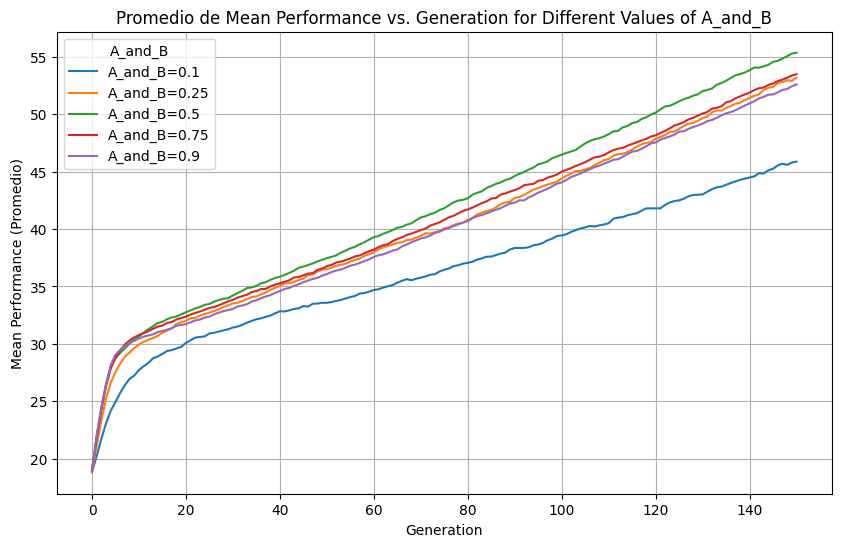

In [70]:
# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv('data/datos7.csv')

# Obtener los valores únicos de A_and_B
unique_values_A_and_B = data['A_and_B'].unique()

# Crear un gráfico para cada valor de A_and_B
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

for value in unique_values_A_and_B:
    subset = data[data['A_and_B'] == value]
    
    # Calcular el promedio de mean_performance para las 10 corridas
    mean_performance_avg = subset.groupby('generation')['mean_performance'].mean()
    
    # Crear un gráfico de línea para el promedio de mean_performance
    plt.plot(mean_performance_avg.index, mean_performance_avg, label=f'A_and_B={value}')

# Configurar etiquetas y leyenda
plt.xlabel('Generation')
plt.ylabel('Mean Performance (Promedio)')
plt.title('Promedio de Performance vs. Generation para diferentes valores de A y B')
plt.legend(title='A_and_B')

# Mostrar el gráfico
plt.grid(True)
plt.show()

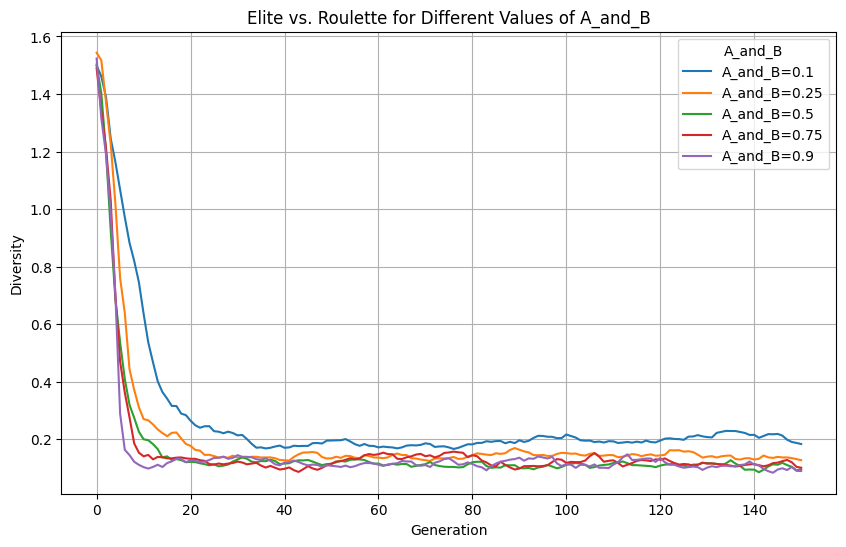

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv('data/datos7.csv')

# Obtener los valores únicos de A_and_B
unique_values_A_and_B = data['A_and_B'].unique()

# Crear un gráfico para cada valor de A_and_B
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

for value in unique_values_A_and_B:
    subset = data[data['A_and_B'] == value]
    
    # Calcular el promedio de mean_performance para las 10 corridas
    mean_diversity_avg = subset.groupby('generation')['diversity'].mean()
    
    # Crear un gráfico de línea para el promedio de mean_performance
    plt.plot(mean_diversity_avg.index, mean_diversity_avg, label=f'A_and_B={value}')

# Configurar etiquetas y leyenda
plt.xlabel('Generation')
plt.ylabel('Diversity')
plt.title('Elite vs. Roulette para diferentes valores de A y B')
plt.legend(title='A_and_B')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Set de Gráficos 4
En esta sección realizaremos una comparación entre los métodos de selección de torneos, el probabilistico contra el determinístico.

Dejamos p_m fija en 0.25, pero estaría bueno hacer un gráfico donde la vayamos variando

In [75]:
gen_limit = 150
repeats = 10

totalIterations = ((gen_limit-1) * 3)

result_list_4 = []

currentIteration = 0 
startTime = time.time()


# TODO: Considerar esto
# for max_gen in range(1,gen_limit):
#     configCopy = copy(config)
#     configCopy['max_generations'] = max_gen

configCopy['p_m'] = 0.25


configCopy = copy(config)
configCopy['selection_method_1'] = 'deterministic_tournament'
configCopy['selection_method_2'] = 'probabilistic_tournament'
configCopy['selection_method_3'] = 'deterministic_tournament'
configCopy['selection_method_4'] = 'probabilistic_tournament'

for selection_percentage  in [0.1, 0.25, 0.5, 0.75, 0.9]:	
    configCopy['A'] = selection_percentage
    configCopy['B'] = selection_percentage
    mean_performances, diversities, generation, end_condition = run_main_2(configCopy)
    
    for run in range(1, repeats+1):
        for i in range(generation):
            result_list_4.append({
                'generation': i,
                'mean_performance': mean_performances[i],
                'diversity': diversities[i],
                'selection_method_1': 'deterministic_tournament',
                'selection_method_2': 'probabilistic_tournament',
                'A_and_B': selection_percentage,
                'run': run
                #'p_m': mutation_prob
            })
        
        currentIteration += 1

        # Imprime el progreso cada 20 iteraciones
        if currentIteration % 20 == 0:
            elapsedTime = time.time() - startTime
            estimatedRemainingTime = (totalIterations - currentIteration) * (elapsedTime / currentIteration)
            percentageCompletion = (currentIteration / totalIterations) * 100
            print(f"\rCompletion: {percentageCompletion:.2f}% ETA: {estimatedRemainingTime:.2f}s", end="")

Completion: 8.95% ETA: 23.15s

In [76]:
df4 = pd.DataFrame(result_list_4)
df4.to_csv('data/datos8.csv', index=False)

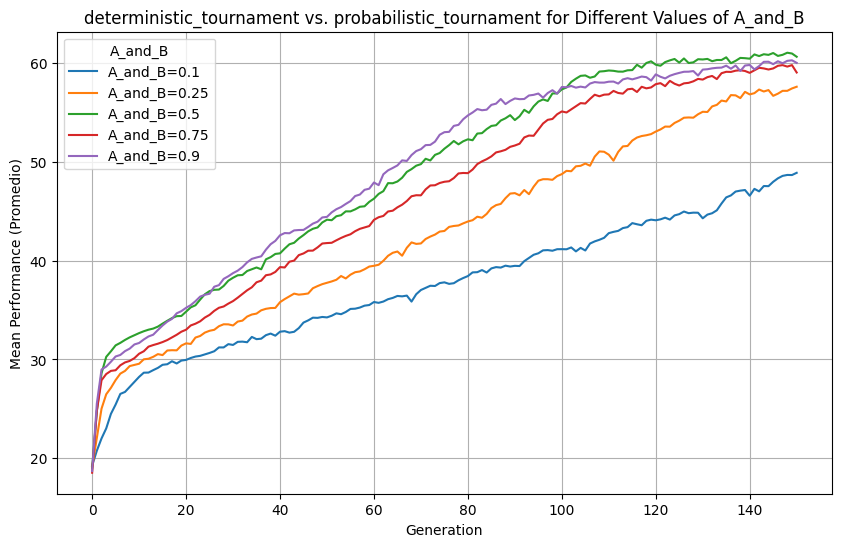

In [78]:
# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv('data/datos8.csv')

# Obtener los valores únicos de A_and_B
unique_values_A_and_B = data['A_and_B'].unique()

# Crear un gráfico para cada valor de A_and_B
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

for value in unique_values_A_and_B:
    subset = data[data['A_and_B'] == value]
    
    # Calcular el promedio de mean_performance para las 10 corridas
    mean_performance_avg = subset.groupby('generation')['mean_performance'].mean()
    
    # Crear un gráfico de línea para el promedio de mean_performance
    plt.plot(mean_performance_avg.index, mean_performance_avg, label=f'A_and_B={value}')

# Configurar etiquetas y leyenda
plt.xlabel('Generation')
plt.ylabel('Mean Performance (Promedio)')
plt.title('Deterministic Tournament vs. Probabilistic Tournamentt para diferentes valores de A y B')
plt.legend(title='A_and_B')

# Mostrar el gráfico
plt.grid(True)
plt.show()

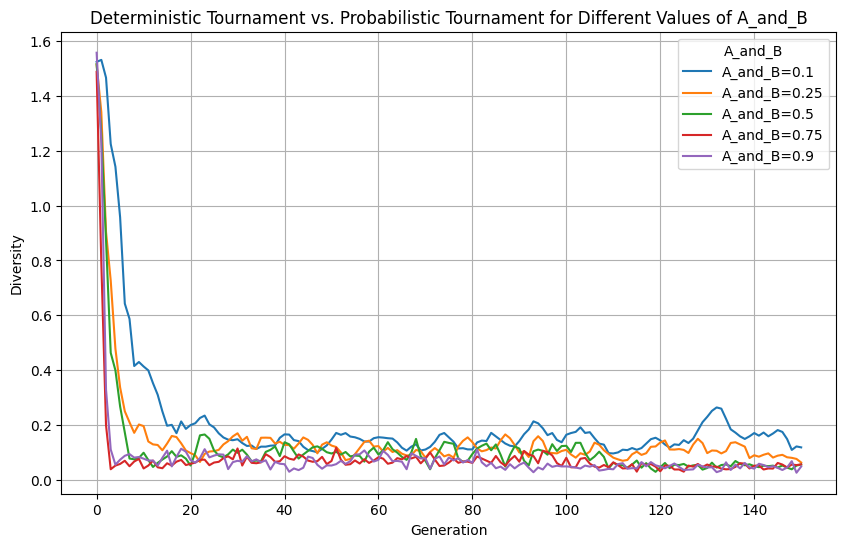

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv('data/datos8.csv')

# Obtener los valores únicos de A_and_B
unique_values_A_and_B = data['A_and_B'].unique()

# Crear un gráfico para cada valor de A_and_B
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

for value in unique_values_A_and_B:
    subset = data[data['A_and_B'] == value]
    
    # Calcular el promedio de mean_performance para las 10 corridas
    mean_diversity_avg = subset.groupby('generation')['diversity'].mean()
    
    # Crear un gráfico de línea para el promedio de mean_performance
    plt.plot(mean_diversity_avg.index, mean_diversity_avg, label=f'A_and_B={value}')

# Configurar etiquetas y leyenda
plt.xlabel('Generation')
plt.ylabel('Diversity')
plt.title('Deterministic Tournament vs. Probabilistic Tournament para diferentes valores de A y B')
plt.legend(title='A_and_B')

# Mostrar el gráfico
plt.grid(True)
plt.show()